# Titanic Dataset
This Titanic Dataset notebook was created for the final project of the _Introduction to Data Analysis_ Udacity course. 
Specificaly, this project is the _Investigate a Dataset_ project. 

This notebook forms an analysis of the dataset of passengers onboard the RMS Titanic in 1912. It contains demographic and passenger information from 891 of the 2224 passengers and crew on board the Titanic. This dataset provides an insightful opportunity to investigate what factors may have affected each passenger's chance of survival. The dataset was obtained from the [Kaggle website](https://www.kaggle.com/c/titanic/data).

The _Introduction to Data Analysis_ course serves as the first course of the Udacity Data Analyst Nanodegree.

## Wrangling the Data
### Load the Data From CSV
Use the _pandas_ Python library to load the Titanic data from the CSV file obtained from the Kaggle website.

In [220]:
import pandas as pd
passengers = pd.read_csv('titanic_data.csv')

In [221]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Add an Additional Column to the DataFrame
The passengers data contains two columns named _'SibSp'_ and _'Parch'_. These columns provide the number of Siblings/Spouses and Parents/Children of the passenger, respectively. We will create a new column called _'Family'_ which will represent the size of family travelling with the passenger. This will be used later to determine whether travelling family size is a factor in the survival of passengers.

In [222]:
# Determine each passengers number of accompanying family members by adding
# 'SibSp' to 'Parch'
passengers['Family'] = passengers['SibSp'] + passengers['Parch']
passengers.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


### Problems in the Data
One problem with the dataset is the fact that some of the passenger ages appear as _'NaN'_ in the DataFrame. It wouldn't be appropriate to address this problem by filling these _NaN_ entries with another value, such as 0, because this would affect any calculations on the age data later. It also wouldn't be appropriate to remove these rows because valuable data in other fields would be lost. Instead, we can setup a separate DataFrame with only rows with valid ages. 

In [223]:
passengers_with_age = passengers.loc[passengers['Age'].notnull()]

We have created a new DataFrame called *passengers_with_age*.

## Investigating the Data

### Find the number of passengers in the data

In [224]:
num_passengers = len(passengers)
print("Total number of passengers: %d" % num_passengers)

Total number of passengers: 891


### Find the survival rate of the passengers
Find how many of the passengers in the dataset survived and calculate the overall survival rate.

In [225]:
# Define a function to take a DataFrame of data and return a
# new DataFrame of passengers with only passengers that survived.
# Also return the number of survivors and percentage of passengers
# who survived.
def GetSurvivors(data):
    survivors = data.loc[data['Survived'] == 1]
    num_survivors = len(survivors)
    survival_rate = float(num_survivors) / float(len(data))
    return (num_survivors, survival_rate, survivors)

# Define a function that describes the survival rate information
def DescribeSurvivalRate(num_survivors, survival_rate, description):
    print("%s:" % description.upper())
    print("No. of survivors: %d" % num_survivors)
    print("Survival rate: %.1f%%" % (survival_rate*100))
    print("")

In [226]:
# Survival rate of all passengers
(num_survivors, total_survival_rate, survivors) = GetSurvivors(passengers)
DescribeSurvivalRate(num_survivors, total_survival_rate, "All Passengers")

ALL PASSENGERS:
No. of survivors: 342
Survival rate: 38.4%



In [227]:
num_passengers_with_age = len(passengers_with_age)
print("No. of passengers with a valid age: %d" % num_passengers_with_age)
print("")
(num_survivors_with_age, survival_rate_with_age, survivors_with_age) = GetSurvivors(passengers_with_age)
DescribeSurvivalRate(num_survivors_with_age, survival_rate_with_age, "All Passengers With a Valid Age")

No. of passengers with a valid age: 714

ALL PASSENGERS WITH A VALID AGE:
No. of survivors: 290
Survival rate: 40.6%



The DataFrame containing only passengers with a valid age contains 714 rows. This provides a healthy sample of data with which to perform age-based analysis. The survival rate of these passengers is 40.6%, which is very close to the overall survival rate.

## Questions
The passenger data is now ready to be analysed. The data raises several questions about the factors that affected each passenger's chance of survival.

### Question 1: Did passenger age affect their chance of survival?
Create histograms of the ages of all passengers and the ages of surviving passengers.

Populating the interactive namespace from numpy and matplotlib


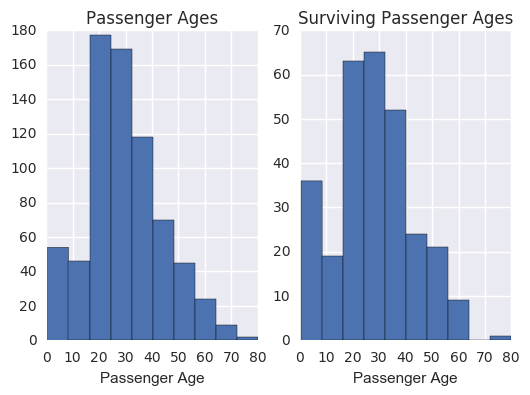

In [228]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(passengers_with_age['Age'], bins=10)
ax1.set_title('Passenger Ages')
ax1.set_xlabel('Passenger Age')

ax2.hist(survivors_with_age['Age'], bins=10)
ax2.set_title('Surviving Passenger Ages')
ax2.set_xlabel('Passenger Age')

The histograms show a striking similarity. They do show a noticable increase in survival for children under 10, but otherwise age doesn't seem to have been a factor in passenger survival.

### Question 2: Did gender play a part in passenger survival?
Lets analyse the difference between the survival of all males and females, regardless of age.

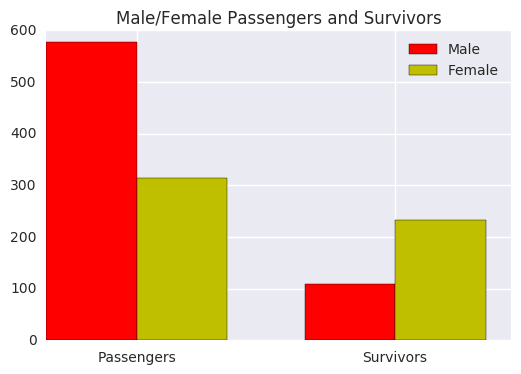

In [229]:
# Create a bar chart of a DataFrame created by grouping passengers
# and survivors into male and female.
s1 = passengers['Sex'].value_counts(sort=False)
s2 = survivors['Sex'].value_counts(sort=False)
df1 = pd.DataFrame([s1, s2],
                  columns=['male', 'female'])

ind = np.arange(2)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, df1['male'], width, color='r')
rects2 = ax.bar(ind + width, df1['female'], width, color='y')

# add some text for labels, title and axes ticks
ax.set_title('Male/Female Passengers and Survivors')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Passengers', 'Survivors'))

ax.legend((rects1[0], rects2[0]), ('Male', 'Female'))

plt.show()

The bar graph shows a stark difference between the survival rate of males and females. The result of these first two questions does raise another question.

### Question 3: Women and Children First?
"Women and children first" was a maritime code of conduct dating from the 19th century but most famously associated with the sinking of the Titanic. It was a code of conduct where the lives of women and children were saved first in life-threatening situations where life-saving resources, such as lifeboats, were limited. Does the data show a successful application of this principle?

In [230]:
# Separate the passengers with valid ages into men, women and children categories.
# Distinguish children as being any passenger with an age under 10.
children_passengers = passengers_with_age.loc[passengers_with_age['Age'] < 10]
men_passengers = passengers_with_age.loc[(passengers_with_age['Age'] >= 10) & 
                                         (passengers_with_age['Sex'] == 'male')]
women_passengers = passengers_with_age.loc[(passengers_with_age['Age'] >= 10) & 
                                           (passengers_with_age['Sex'] == 'female')]

num_men_passenger = len(men_passengers)
num_women_passenger = len(women_passengers)
num_children_passenger = len(children_passengers)
print("Number of men passengers: %d" % num_men_passenger)
print("Number of women passengers: %d" % num_women_passenger)
print("Number of child passengers: %d" % num_children_passenger)

Number of men passengers: 421
Number of women passengers: 231
Number of child passengers: 62


In [231]:
# Determine the respective survival rates of men, women and children
(num_men_survivors, men_survival_rate, men_survivors) = GetSurvivors(men_passengers)
DescribeSurvivalRate(num_men_survivors, men_survival_rate, "Men Passengers With a Valid Age")

(num_women_survivors, women_survival_rate, women_survivors) = GetSurvivors(women_passengers)
DescribeSurvivalRate(num_women_survivors, women_survival_rate, "Women Passengers With a Valid Age")

(num_child_survivors, child_survival_rate, children_survivors) = GetSurvivors(children_passengers)
DescribeSurvivalRate(num_child_survivors, child_survival_rate, "Children Passengers With a Valid Age")

MEN PASSENGERS WITH A VALID AGE:
No. of survivors: 74
Survival rate: 17.6%

WOMEN PASSENGERS WITH A VALID AGE:
No. of survivors: 178
Survival rate: 77.1%

CHILDREN PASSENGERS WITH A VALID AGE:
No. of survivors: 38
Survival rate: 61.3%



The data does show a significant difference in the survival rates of men, women and children, especially between men and women. There could well be other factors, though, affecting the survival rates of men, women and children.

### Question 4: Did the class of ticket each passenger held affect their chance of survival?

There were three classes of tickets on the Titanic: First, Second and Third. Ticket classes in the days of the Titanic were more than just about pricing structure, they were a means to separate the classes of passengers between Upper Class, Middle Class and Lower Class. As such, they are a proxy representation of socio-economic status.

In [232]:
# Create groups of First, Second and Third class passengers.
first_class_passengers = passengers.loc[passengers['Pclass'] == 1]
num_first_class_passengers = len(first_class_passengers)
print "First class passengers: %d" % num_first_class_passengers

second_class_passengers = passengers.loc[passengers['Pclass'] == 2]
num_second_class_passengers = len(second_class_passengers)
print "Second class passengers: %d" % num_second_class_passengers

third_class_passengers = passengers.loc[passengers['Pclass'] == 3]
num_third_class_passengers = len(third_class_passengers)
print "Third class passengers: %d" % num_third_class_passengers

First class passengers: 216
Second class passengers: 184
Third class passengers: 491


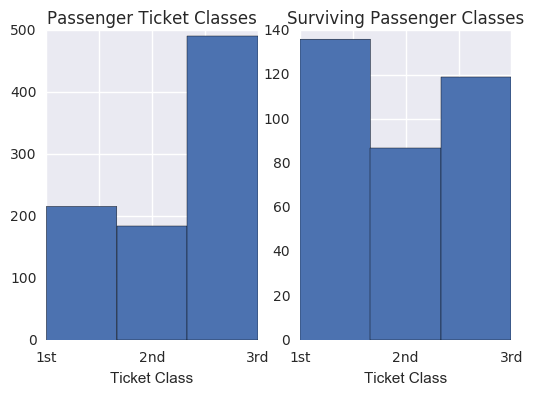

In [233]:
# Create histograms of passengers and survivors based on ticket class
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(passengers['Pclass'], bins=3)
ax1.set_title('Passenger Ticket Classes')
ax1.set_xlabel('Ticket Class')
ax1.set_xticklabels(('1st', '' , '2nd', '' , '3rd'))

ax2.hist(survivors['Pclass'], bins=3)
ax2.set_title('Surviving Passenger Classes')
ax2.set_xlabel('Ticket Class')
ax2.set_xticklabels(('1st', '' , '2nd', '' , '3rd'))

The histograms show different shapes, suggesting different survival rates across the classes.

In [234]:
(num_first_class_survivors, fc_survival_rate, first_class_survivors) = GetSurvivors(first_class_passengers)
DescribeSurvivalRate(num_first_class_survivors, fc_survival_rate, "First Class Passengers")

(num_second_class_survivors, sc_survival_rate, second_class_survivors) = GetSurvivors(second_class_passengers)
DescribeSurvivalRate(num_second_class_survivors, sc_survival_rate, "Second Class Passengers")

(num_third_class_survivors, tc_survival_rate, third_class_survivors) = GetSurvivors(third_class_passengers)
DescribeSurvivalRate(num_third_class_survivors, tc_survival_rate, "Third Class Passengers")

FIRST CLASS PASSENGERS:
No. of survivors: 136
Survival rate: 63.0%

SECOND CLASS PASSENGERS:
No. of survivors: 87
Survival rate: 47.3%

THIRD CLASS PASSENGERS:
No. of survivors: 119
Survival rate: 24.2%



The Upper Classes enjoyed a much higher chance of survival compared to Lower Class passengers. First Class passengers survived at a rate of 63%, compared to 24% for Third Class passengers.

### Question 5: Did port of embarkation affect chance of survival?

In [235]:
# Group passengers based on which port they embarked from.
port_c_passengers = passengers.loc[passengers['Embarked'] == 'C']
num_port_c_passengers = len(port_c_passengers)
port_q_passengers = passengers.loc[passengers['Embarked'] == 'Q']
num_port_q_passengers = len(port_q_passengers)
port_s_passengers = passengers.loc[passengers['Embarked'] == 'S']
num_port_s_passengers = len(port_s_passengers)

print("Passengers embarking at Cherbourg: %d" % num_port_c_passengers)
print("Passengers embarking at Queenstown: %d" % num_port_q_passengers)
print("Passengers embarking at Southampton: %d" % num_port_s_passengers)

Passengers embarking at Cherbourg: 168
Passengers embarking at Queenstown: 77
Passengers embarking at Southampton: 644


In [236]:
(num_cherbourg_survivors, c_survival_rate, cherbourg_survivors) = GetSurvivors(port_c_passengers)
DescribeSurvivalRate(num_cherbourg_survivors, c_survival_rate, "Passengers Embarking at Cherbourg")

(num_queenstown_survivors, q_survival_rate, queenstown_survivors) = GetSurvivors(port_q_passengers)
DescribeSurvivalRate(num_queenstown_survivors, q_survival_rate, "Passengers Embarking at Queenstown")

(num_southhampton_survivors, s_survival_rate, southhampton_survivors) = GetSurvivors(port_s_passengers)
DescribeSurvivalRate(num_southhampton_survivors, s_survival_rate, "Passengers Embarking at Southampton")

PASSENGERS EMBARKING AT CHERBOURG:
No. of survivors: 93
Survival rate: 55.4%

PASSENGERS EMBARKING AT QUEENSTOWN:
No. of survivors: 30
Survival rate: 39.0%

PASSENGERS EMBARKING AT SOUTHAMPTON:
No. of survivors: 217
Survival rate: 33.7%



In [237]:
first_class_port_c_passengers = port_c_passengers.loc[passengers['Pclass'] == 1]
print("First class passengers from Cherbourg: %d" % len(first_class_port_c_passengers))

First class passengers from Cherbourg: 85


In [238]:
(num_first_class_cherbourg_survivors, fc_cherbourg_survival_rate, first_class_cherbourg_survivors) = GetSurvivors(first_class_port_c_passengers)
DescribeSurvivalRate(num_first_class_cherbourg_survivors, fc_cherbourg_survival_rate, "First Class Passengers Embarking at Cherbourg")

FIRST CLASS PASSENGERS EMBARKING AT CHERBOURG:
No. of survivors: 59
Survival rate: 69.4%



In [239]:
third_class_port_s_passengers = port_s_passengers.loc[passengers['Pclass'] == 3]
print("Third class passengers from Southhampton: %d" % len(third_class_port_s_passengers))

Third class passengers from Southhampton: 353


Passengers embarking at Cherbourg had a significant increase in survival rate over other passengers, but this seems to be because a large number of First Class passengers embarked there.

### Question 6: Did passengers with family members on board have a higher chance of survival?

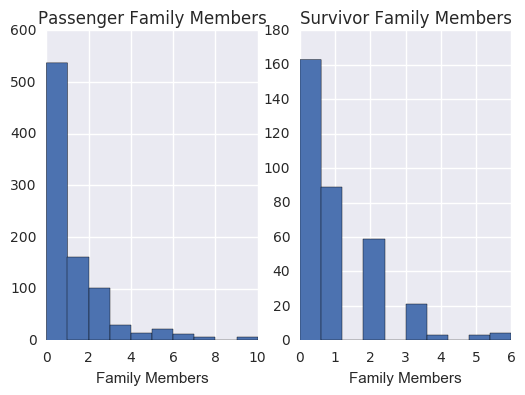

In [240]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.hist(passengers['Family'], bins=10)
ax1.set_title('Passenger Family Members')
ax1.set_xlabel('Family Members')

ax2.hist(survivors['Family'], bins=10)
ax2.set_title('Survivor Family Members')
ax2.set_xlabel('Family Members')

The shape of the histograms suggests that passengers with family members on board might have had a better chance of survival.
We will plot the survival rates on a bar graph.

In [241]:
family_0_passengers = passengers.loc[passengers['Family'] == 0]
(num_family_0_survivors, f0_survival_rate, family_0_survivors) = GetSurvivors(family_0_passengers)

family_1_passengers = passengers.loc[passengers['Family'] == 1]
(num_family_1_survivors, f1_survival_rate, family_1_survivors) = GetSurvivors(family_1_passengers)

family_2_passengers = passengers.loc[passengers['Family'] == 2]
(num_family_2_survivors, f2_survival_rate, family_2_survivors) = GetSurvivors(family_2_passengers)

family_3_passengers = passengers.loc[passengers['Family'] == 3]
(num_family_3_survivors, f3_survival_rate, family_3_survivors) = GetSurvivors(family_3_passengers)

family_4_passengers = passengers.loc[passengers['Family'] == 4]
(num_family_4_survivors, f4_survival_rate, family_4_survivors) = GetSurvivors(family_4_passengers)

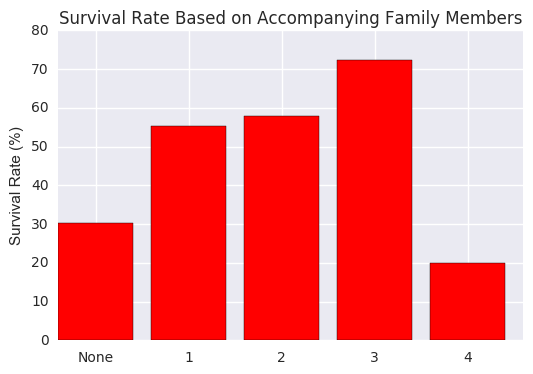

In [242]:
s0 = f0_survival_rate * 100
s1 = f1_survival_rate * 100
s2 = f2_survival_rate * 100
s3 = f3_survival_rate * 100
s4 = f4_survival_rate * 100
df2 = pd.DataFrame({'rates' : [s0, s1, s2, s3, s4]},
                    index=[0, 1, 2, 3, 4])

fig, ax = plt.subplots()
width = 0.8
rects = ax.bar(df2.index, df2['rates'], width=width, color='r')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate Based on Accompanying Family Members')
ax.set_xticks(df2.index + width/2)
ax.set_xticklabels(('None', '1', '2', '3', '4'))
plt.show()

The bar graph does suggest that passengers with 1, 2 or 3 family members on board had a better chance of survival. We can only speculate as to why this would be so. Possibly because mothers were given priority over other women. However, the number of multi-member families may be too small to make this result reliable.

### Question 7: Did the passengers pay consistant fares across the ticket class?
Were the passengers charged according to a consistent pricing structure in each of the three ticket classes?

In [243]:
# Group fares based on class
# Group Passengers by Sex/Class
grouped_by_class = passengers.groupby(['Pclass'])
mean_fares = grouped_by_class['Fare'].mean()
std_fares = grouped_by_class['Fare'].std()
print("The mean fare in First Class: %.2f      variance: %.2f" % (mean_fares[1], std_fares[1]))
print("The mean fare in Second Class: %.2f     variance: %.2f" % (mean_fares[2], std_fares[2]))
print("The mean fare in Third Class: %.2f      variance: %.2f" % (mean_fares[3], std_fares[3]))

The mean fare in First Class: 84.15      variance: 78.38
The mean fare in Second Class: 20.66     variance: 13.42
The mean fare in Third Class: 13.68      variance: 11.78


In [244]:
# Define a function for standardising a vector of data
def StandardiseVector(data):
    return (data - data.mean()) / data.std(ddof=0)

In [245]:
# Find the correlation between Fare/Pclass
fare = passengers['Fare']
pclass = passengers['Pclass']

standardised_fares = StandardiseVector(passengers['Fare'])
standardised_class = StandardiseVector(passengers['Pclass'])

r1 = (standardised_fares * standardised_class).mean()
print("Pearson's correlation coefficient: %f" % r1)
r2 = np.corrcoef(fare, pclass)[1, 0]
print("Pearson's correlation coefficient (via NumPy): %f" % r2)

Pearson's correlation coefficient: -0.549500
Pearson's correlation coefficient (via NumPy): -0.549500


The correlation coefficient suggests that weren't very consistent in each of the three ticket classes. This is supported by the standard deviation of the fares charged in each ticket class. 

## Conclusion

In conclusion, it would seem that the only factors that have a significant and reliable affect on passenger survival are:
* Sex of the passenger
* Social class of the passenger

It might be useful to group the passengers by both of these factors to see the full range of survival probability for different cateories of passenger. Grouping by _'Sex'_ and _'Pclass'_ will produce six categories of passenger:
* First Class female passenger
* Second Class female passenger
* Third Class female passenger
* First Class male passenger
* Second Class male passenger
* Third Class male passenger

In [246]:
# Group Passengers by Sex/Class
grouped_passengers = passengers.groupby(['Sex', 'Pclass'])
group_survival_rates = []
for name, group in grouped_passengers: 
    (num_group_survivors, group_survival_rate, group_survivors) = GetSurvivors(group)
    group_survival_rates.append(group_survival_rate*100)
group_survival_rates

[96.80851063829788,
 92.10526315789474,
 50.0,
 36.885245901639344,
 15.74074074074074,
 13.544668587896252]

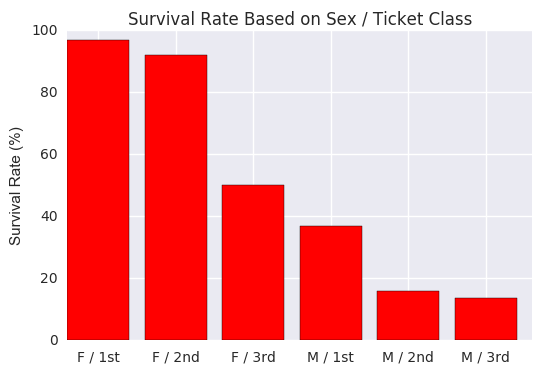

In [247]:
df3 = pd.DataFrame({'rates' : group_survival_rates},
                    index=[0, 1, 2, 3, 4, 5])

fig, ax = plt.subplots()
width = 0.8
rects = ax.bar(df3.index, df3['rates'], width=width, color='r')
ax.set_ylabel('Survival Rate (%)')
ax.set_title('Survival Rate Based on Sex / Ticket Class')
ax.set_xticks(df3.index + width/2)
ax.set_xticklabels(('F / 1st', 'F / 2nd', 'F / 3rd', 'M / 1st', 'M / 2nd', 'M / 3rd'))
plt.show()

The bar graph shows a distinct difference in the survival chance for different categories of passengers. A female in First Class had an almost inevitable chance of survival, whereas a male in Third Class had little chance of surviving.